In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank=["AXISBANK","HDFCBANK","ICICIBANK","INDUSINDBK","KOTAKBANK","SBIN"]
data=[]
for i in bank:
    data.append(pd.read_csv("stock files\\"+i+".csv"))

In [3]:
df=pd.concat(data)

In [4]:
df.replace(["KOTAKMAH","UTIBANK"],["KOTAKBANK","AXISBANK"],inplace=True)

In [5]:
df['newdate']=pd.to_datetime(df.Date)

In [6]:
df1=df[['Symbol','Open','newdate']]

In [7]:
df1

,Symbol,Open,newdate
0,AXISBANK,26.70,2000-01-03
1,AXISBANK,27.00,2000-01-04
2,AXISBANK,26.00,2000-01-05
3,AXISBANK,25.80,2000-01-06
4,AXISBANK,25.00,2000-01-07
...,...,...,...
5301,SBIN,339.25,2021-04-26
5302,SBIN,344.00,2021-04-27
5303,SBIN,357.00,2021-04-28
5304,SBIN,365.00,2021-04-29


In [8]:
axis=df1.groupby('Symbol').get_group('AXISBANK')
kotak=df1.groupby('Symbol').get_group('KOTAKBANK')
sbi=df1.groupby('Symbol').get_group('SBIN')
icici=df1.groupby('Symbol').get_group('ICICIBANK')
ind=df1.groupby('Symbol').get_group('INDUSINDBK')
hdfc=df1.groupby('Symbol').get_group('HDFCBANK')

In [9]:
ax=axis.groupby(pd.Grouper(key='newdate',freq='M')).mean()

In [10]:
ax

,Open
newdate,
2000-01-31,25.660000
2000-02-29,39.221429
2000-03-31,33.054762
2000-04-30,35.500000
2000-05-31,35.922727
...,...
2020-12-31,611.879545
2021-01-31,659.707500
2021-02-28,742.442500


In [11]:
#ax1=ax[['newdate','Open']]

<AxesSubplot:xlabel='newdate'>

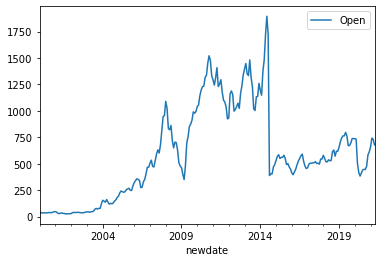

In [12]:
ax.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
res=adfuller(ax['Open'])

In [15]:
def adfuller_test(Open):
    result=adfuller(Open)
    labels=['ADF test statistic','p-value','lags used','number of observations used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print("strong evidence against the null hypothesis,reject the null hypothesis,data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis,time series has unit root and is non-stationary")

In [16]:
adfuller_test(ax['Open'])

ADF test statistic : -2.2885900436655473
p-value : 0.17567432020982748
lags used : 2
number of observations used : 253
weak evidence against null hypothesis,time series has unit root and is non-stationary


In [18]:
ax['open_diff']=ax['Open']-ax['Open'].shift(12)

In [20]:
ax.head(15)

,Open,open_diff
newdate,,
2000-01-31,25.660000,NaN
2000-02-29,39.221429,NaN
2000-03-31,33.054762,NaN
2000-04-30,35.500000,NaN
2000-05-31,35.922727,NaN
2000-06-30,34.059091,NaN
2000-07-31,37.414286,NaN
2000-08-31,38.154545,NaN
2000-09-30,38.117500,NaN


In [22]:
adfuller_test(ax['open_diff'].dropna())

ADF test statistic : -3.579212987185286
p-value : 0.006171094452912555
lags used : 13
number of observations used : 230
strong evidence against the null hypothesis,reject the null hypothesis,data has no unit root and is stationary


<AxesSubplot:xlabel='newdate'>

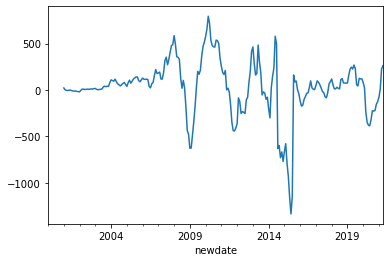

In [23]:
ax['open_diff'].plot()

# Auto regressive model

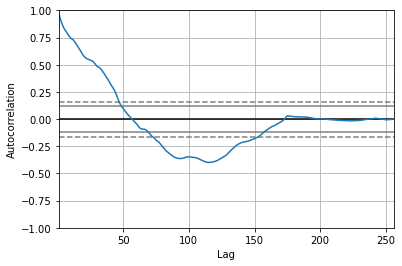

In [61]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ax['Open'])
plt.show()

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [38]:
import statsmodels.api as sm

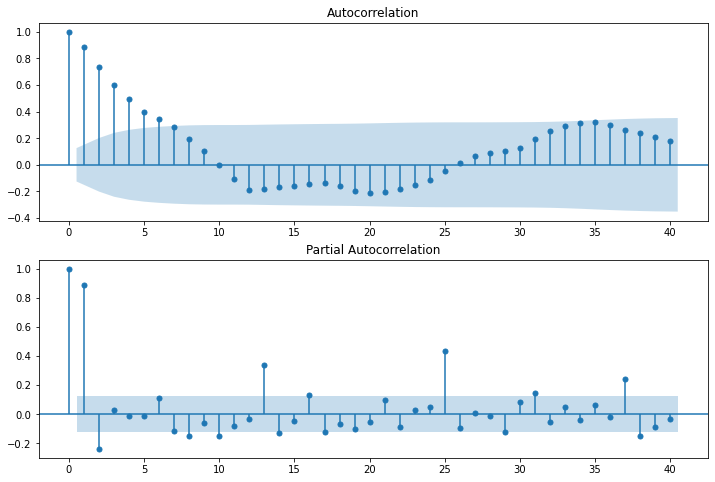

In [39]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ax['open_diff'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ax['open_diff'].iloc[13:],lags=40,ax=ax2)


In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
model=ARIMA(ax['Open'],order=(1,1,1))
model_fit=model.fit()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA ha

In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                  255
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1545.189
Method:                       css-mle   S.D. of innovations            103.601
Date:                Wed, 06 Oct 2021   AIC                           3098.378
Time:                        22:49:46   BIC                           3112.543
Sample:                    02-29-2000   HQIC                          3104.075
                         - 04-30-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5389      7.568      0.335      0.737     -12.294      17.372
ar.L1.D.Open    -0.1110      0.225     -0.493      0.622      -0.552       0.330
ma.L1.D.Open     0.2966      0.212      1.401      0.161      -0.118       0.711
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.0119           +0.0000j            9.0119            0.5000
MA.1           -3.3719           +0.0000j            3.3719            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='newdate'>

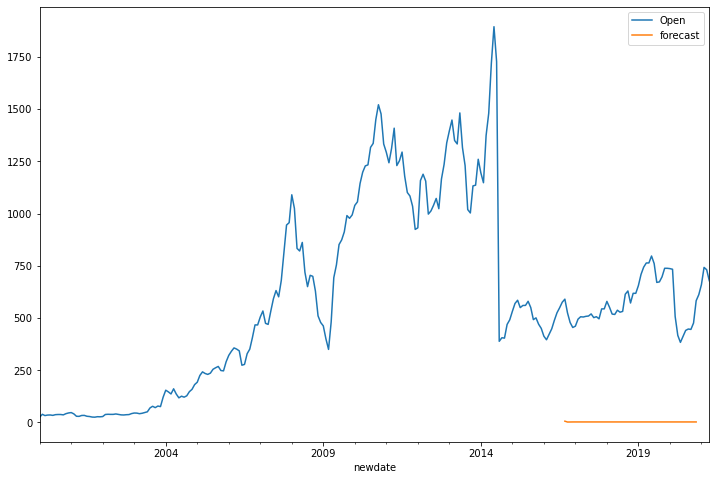

In [47]:
ax['forecast']=model_fit.predict(start=200,end=250,dynamic=True)
ax[['Open','forecast']].plot(figsize=(12,8))

In [48]:
model=sm.tsa.statespace.SARIMAX(ax['Open'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:xlabel='newdate'>

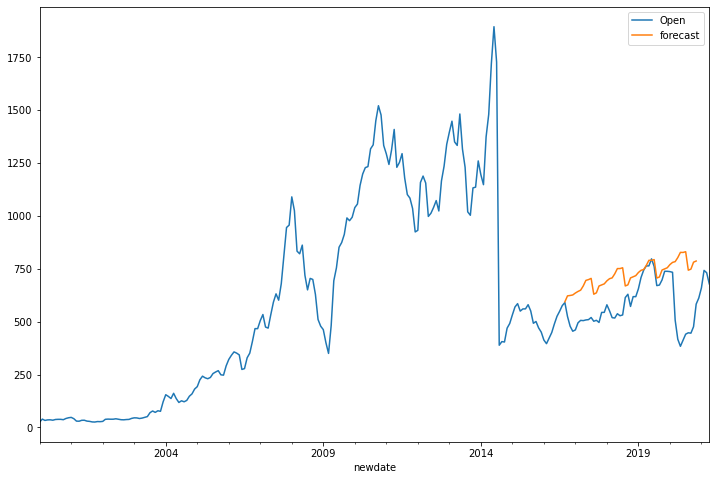

In [50]:
ax['forecast']=results.predict(start=200,end=250,dynamic=True)
ax[['Open','forecast']].plot(figsize=(12,8))

In [51]:
from pandas.tseries.offsets import DateOffset
future_dates=[ax.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [53]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=ax.columns)

In [54]:
future_datest_df.tail()

,Open,open_diff,forecast
2022-11-30,NaN,NaN,NaN
2022-12-30,NaN,NaN,NaN
2023-01-30,NaN,NaN,NaN
2023-02-28,NaN,NaN,NaN
2023-03-30,NaN,NaN,NaN


In [55]:
future_df=pd.concat([ax,future_datest_df])


<AxesSubplot:>

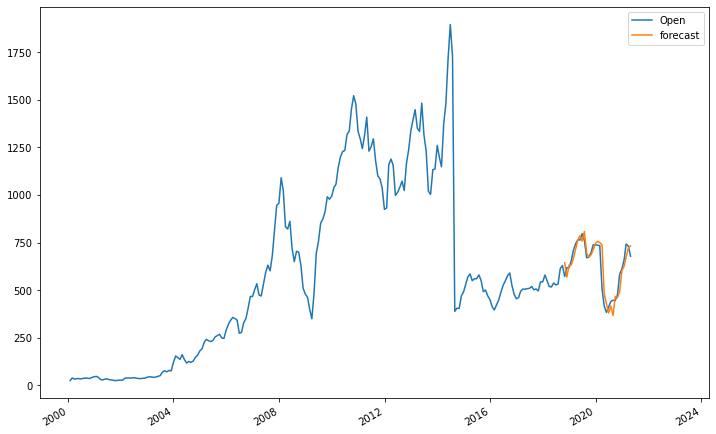

In [59]:
future_df['forecast']=results.predict(start=225,end=280,dynamics=True)
future_df[['Open','forecast']].plot(figsize=(12,8))